In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import normaltest
from scipy.stats import kruskal
from scipy.stats import alexandergovern
from scipy.stats import bartlett
from scipy.stats import chisquare

# Recode Vars in Datasets

In [5]:
post_df = pd.read_csv('dlnmRev_updated/data_for_DLNMs/post_df.csv')

post_df2 = pd.read_csv('dlnmRev_updated/data_for_DLNMs/post_df_ALLVARS.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dlnmRev_updated/data_for_DLNMs/post_df_ALLVARS.csv'

In [26]:
#check alignment
for idx, var in enumerate(post_df['BMI']):
    if var != post_df2.iloc[idx]['BMI']:
        print(idx)

#### Realign Race/Ethnicity

In [27]:
post_df['Hispanic or Latino or Spanish Ethnicity_Mod'] = post_df2['Hispanic or Latino or Spanish Ethnicity_Mod']

In [28]:
post_df['Race'] = post_df2['Race']

In [29]:
post_df['Race'].value_counts()

White                                 3596
Other                                  130
Black / African American               121
Asian                                   35
American Indian / Alaskan Native        16
Native Hawaiian / Pacific Islander       8
Race - Other                             8
Name: Race, dtype: int64

In [30]:
race_mod = []
for race in post_df['Race']:
    if race == 'White':
        race_mod.append('white')
    elif race == 'Black / African American':
        race_mod.append('black')
    else:
        race_mod.append('other')
post_df['Race_Mod'] = race_mod

#### Fix Readmission Coding

In [34]:
post_df['Readmission'].value_counts()

0     3550
1      389
No       3
Name: Readmission, dtype: int64

In [38]:
readmit_recoded = [1 if readmit == '1' or readmit == 1 else 0 for readmit in post_df['Readmission']]
np.sum(readmit_recoded)

In [40]:
post_df['Readmission'] = readmit_recoded

In [42]:
post_df.to_csv('dlnmRev_updated/data_for_DLNMs/post_df_WITH_RACE.csv')

# Table 1

In [43]:
post_df = pd.read_csv('dlnmRev_updated/data_for_DLNMs/post_df_WITH_RACE.csv')

In [44]:
season = []
for pt_idx in post_df.index:
    if post_df.iloc[pt_idx].disch__spring == 1:
        season.append(0)
    elif post_df.iloc[pt_idx].disch__summer == 1:
        season.append(1)
    elif post_df.iloc[pt_idx].disch__winter == 1:
        season.append(3)
    else:
        season.append(2)

post_df['season_agg'] = season

In [45]:
post_90_df = post_df[post_df['mean_post_disch_mean_temp_C'] >= np.nanpercentile(post_df['mean_post_disch_mean_temp_C'],90)]
post_10_df = post_df[post_df['mean_post_disch_mean_temp_C'] <= np.nanpercentile(post_df['mean_post_disch_mean_temp_C'],10)]

post_mid_df =  post_df[post_df['mean_post_disch_mean_temp_C'] < np.nanpercentile(post_df['mean_post_disch_mean_temp_C'],90)]
post_mid_df = post_mid_df[post_mid_df['mean_post_disch_mean_temp_C'] > np.nanpercentile(post_df['mean_post_disch_mean_temp_C'],10)]




# Table 1

PATIENT AGE


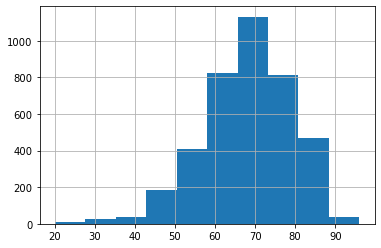

BMI


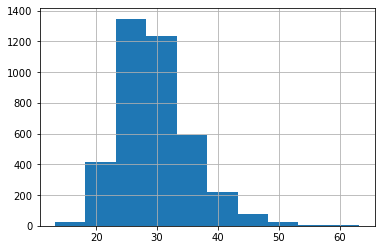

LOS


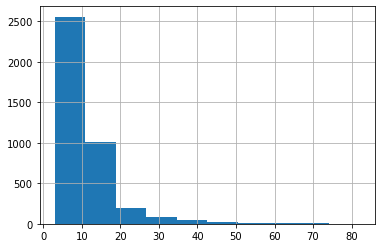

TIME_TO_SURGERY


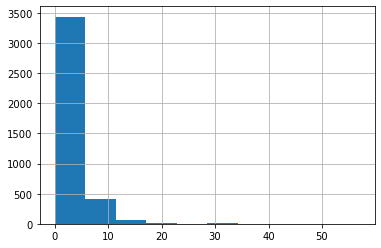

TIME_FROM_SURGERY_TO_DISCHARGE


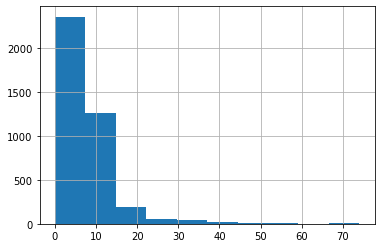

RF-LAST A1C LEVEL


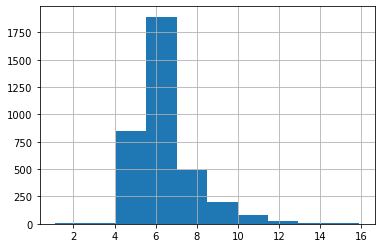

RF-LAST HEMATOCRIT


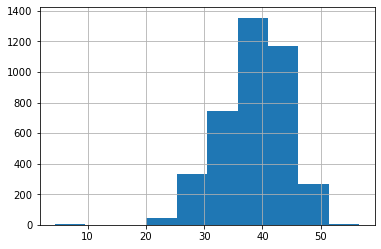

RF-LAST CREAT LEVEL


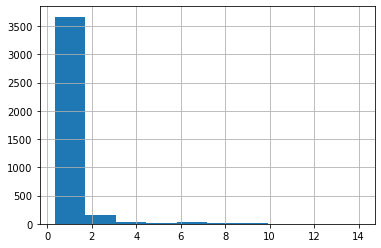

RF-LAST WBC COUNT


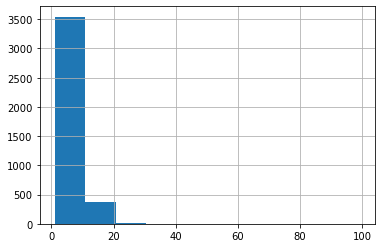

RF-PLATELETS


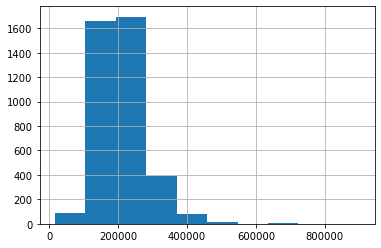

RF-INR


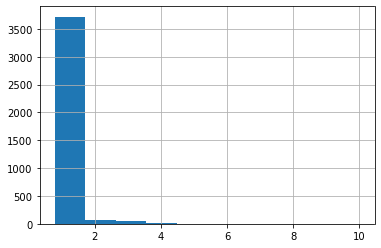

RF-TOTAL BILIRUBIN


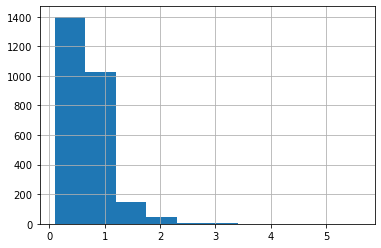

RF-TOTAL ALBUMIN


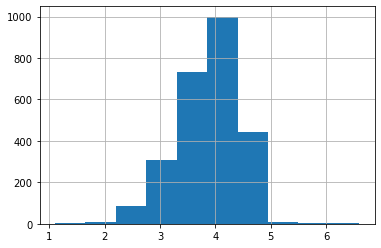

HEMO DATA-EF


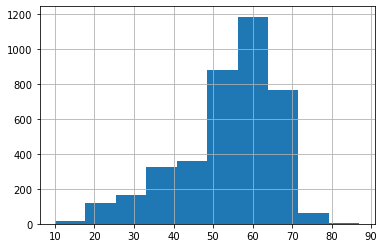

OR_TIME


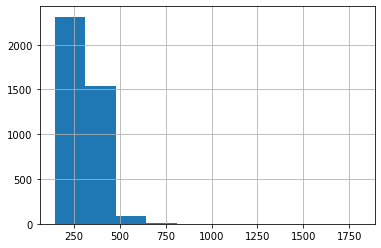

CARDIOPULMONARY BYPASS TIME


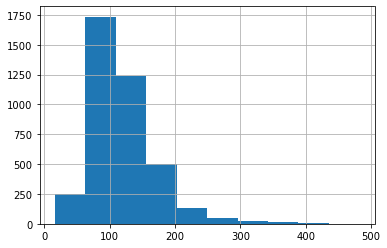

INITIAL ICU HOURS


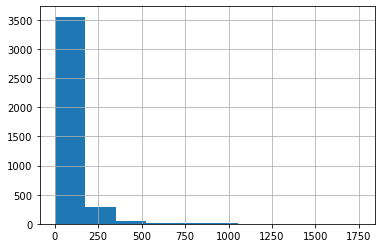

MEAN_POST_DISCH_MEAN_TEMP_C


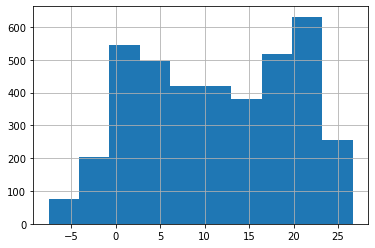

MEAN_POST_DISCH_PM10


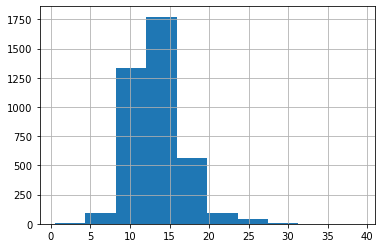

MEAN_POST_DISCH_PM25


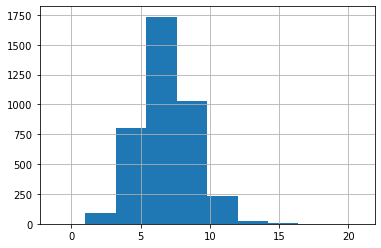

MEAN_POST_DISCH_O3


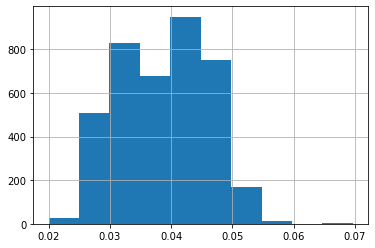

MEAN_POST_DISCH_CO


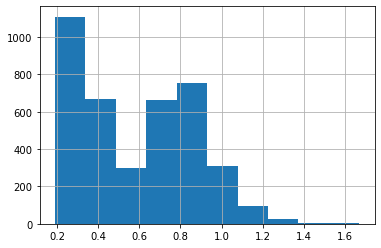

MEAN_POST_DISCH_NO2


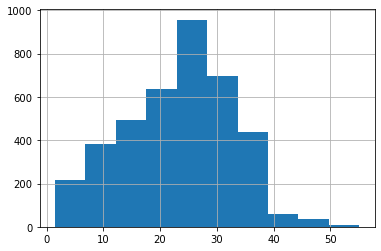

MEAN_POST_DISCH_SO2


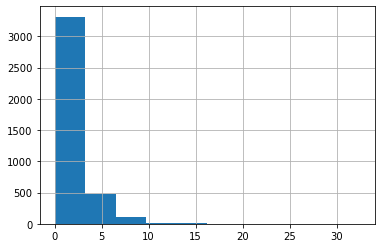

SEX_MOD


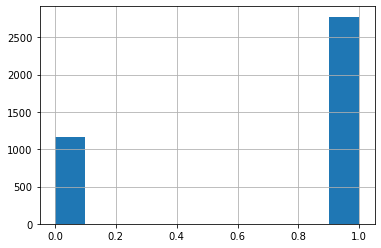

Mean:  0.7042110603754439
[278, 2220, 278] [283, 2210, 283]
MEDICAID


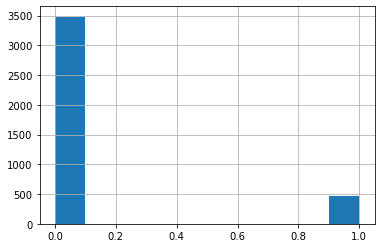

Mean:  0.11669203450025367
[46, 368, 46] [33, 382, 45]
STATUS_MOD


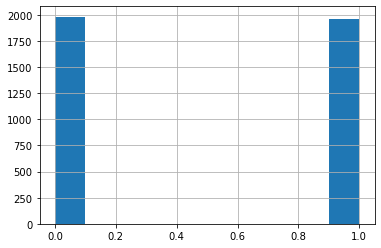

Mean:  0.4972095383054287
[196, 1567, 196] [207, 1566, 187]
HISPANIC OR LATINO OR SPANISH ETHNICITY_MOD


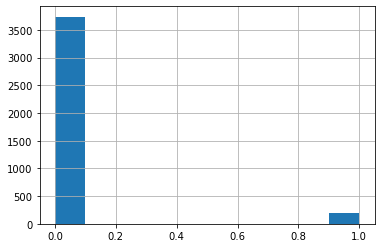

Mean:  0.051496702181633686
[20, 162, 20] [19, 161, 23]
RF-DIABETES_MODIFIED


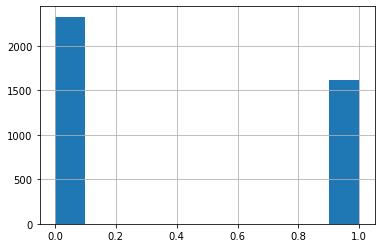

Mean:  0.4094368340943683
[162, 1291, 162] [183, 1284, 147]
RF-RENAL FAIL-DIALYSIS_MODIFIED


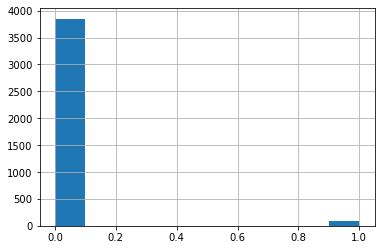

Mean:  0.023090586145648313
[9, 73, 9] [8.0, 72.0, 11.0]
RF-PERIPHERAL ARTERIAL DISEASE_MODIFIED


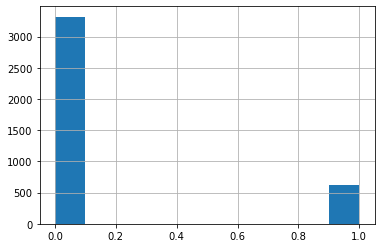

Mean:  0.15808170515097691
[62, 498, 62] [56.0, 498.0, 69.0]
RF-CEREBROVASCULAR DIS_MODIFIED


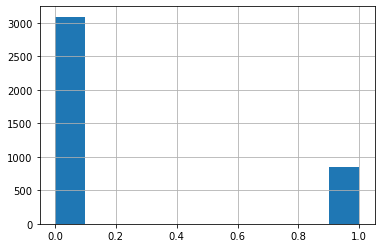

Mean:  0.21537290715372906
[85, 679, 85] [90, 668, 91]
RF-IMMUNOCOMPROMISE_MODIFIED


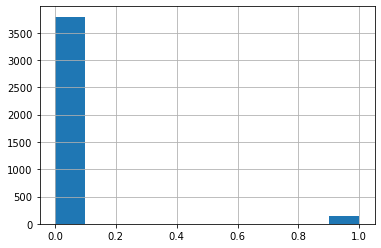

Mean:  0.037300177619893425
[15, 118, 15] [10.0, 119.0, 18.0]
RF-CHRONIC LUNG DISEASE_MOD


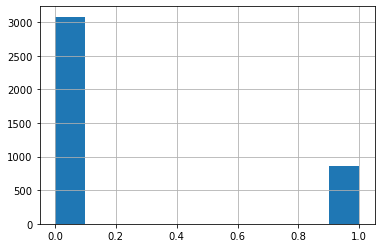

Mean:  0.21841704718417046
[86, 688, 86] [89, 697, 75]
RF-HIGH ALCOHOL USE_MOD


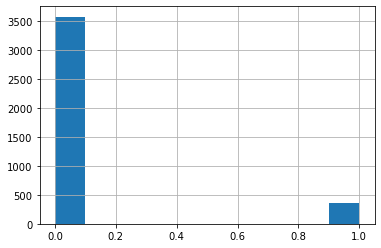

Mean:  0.09259259259259259
[37, 292, 37] [35, 298, 32]
RF-ILLICIT DRUG USE_MOD


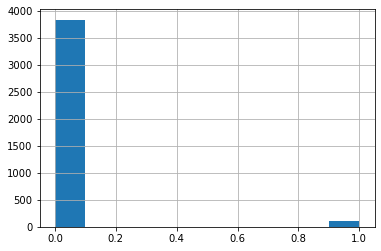

Mean:  0.0273972602739726
[11, 86, 11] [9, 88, 11]
PRIOR MI_MODIFIED


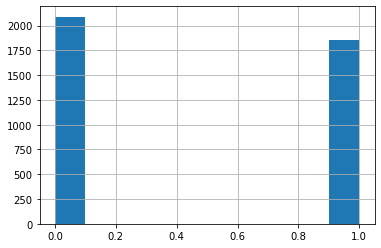

Mean:  0.4698122780314561
[186, 1481, 186] [196, 1464, 192]
PREV CARDIAC INTERVENT_MODIFIED


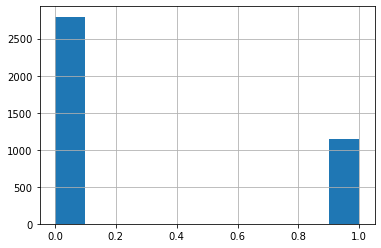

Mean:  0.2907153729071537
[115, 916, 115] [122, 915, 109]
IABP_MODIFIED


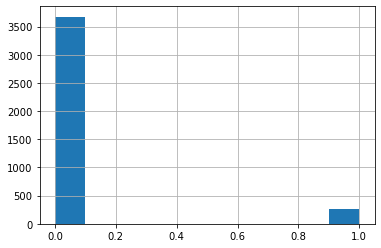

Mean:  0.06773211567732115
[27, 213, 27] [29, 207, 31]
CARDIOGENIC SHOCK_MOD


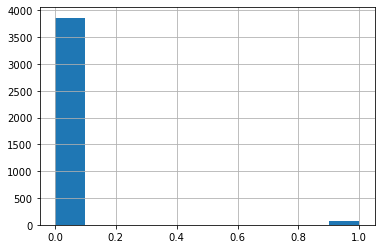

Mean:  0.020040588533739218
[8, 63, 8] [9, 61, 9]
CARDIAC ARRHYTHMIA_MOD


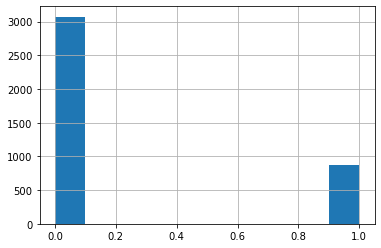

Mean:  0.2207001522070015
[87, 696, 87] [85, 707, 78]
MV_REPAIR


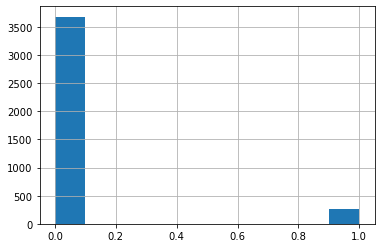

Mean:  0.0654490106544901
[26, 206, 26] [19, 204, 35]
MV_REPLACEMENT


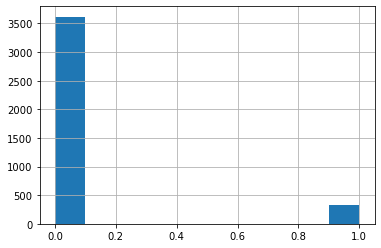

Mean:  0.0821917808219178
[32, 259, 32] [34, 258, 32]
CAB_MOD_MODIFIED


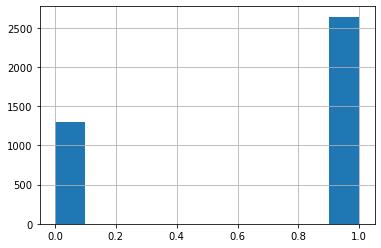

Mean:  0.6699644850329782
[265, 2112, 265] [257, 2124, 260]
VS-AORTIC_MODIFIED


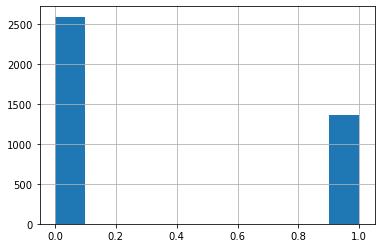

Mean:  0.3437341451040081
[136, 1083, 136] [148, 1080, 127]
READMISSION TO ICU_MODIFIED


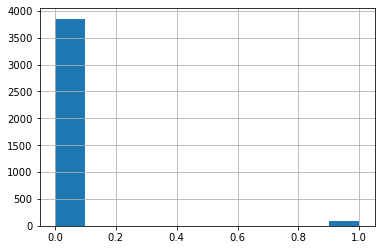

Mean:  0.022577371892440384
[9, 71, 9] [14, 63, 12]
IN HOSPITAL POST-OP EVENTS_MODIFIED


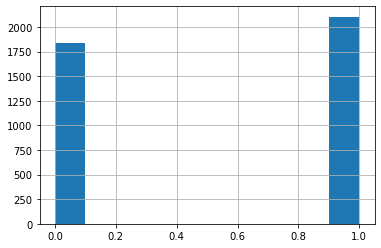

Mean:  0.5337392186707255
[211, 1682, 211] [218, 1675, 211]
POST-OP-REOP


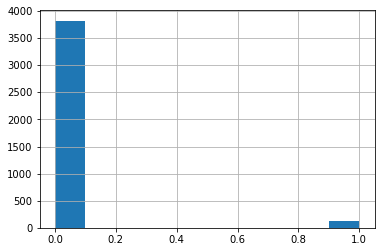

Mean:  0.030187721968543885
[12, 95, 12] [10, 100, 9]
POST-OP-PULM-PNEUMONIA_MODIFIED_MODIFIED


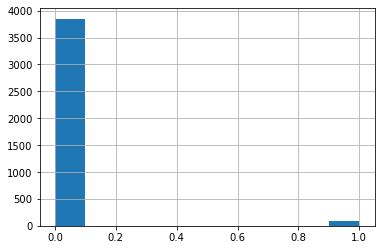

Mean:  0.023338406900050734
[9, 74, 9] [13, 75, 4]
POST-OP-PULM-VENT PROLONGED_MODIFIED_MODIFIED


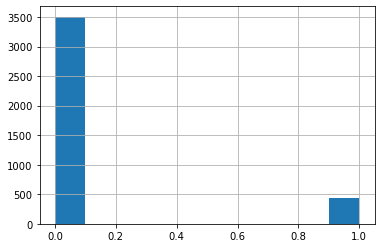

Mean:  0.1111111111111111
[44, 350, 44] [44, 346, 48]
POST-OP-PULMONARY THROMBOEMBOLISM_MODIFIED_MODIFIED


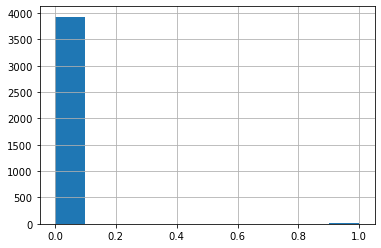

Mean:  0.0027904616945712835
[1, 9, 1] [2, 7, 2]
POSTOP INTUBATION/REINTUBATION DURING HOSPITAL STAY_MODIFIED


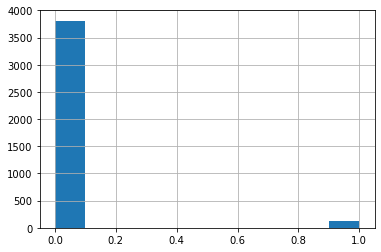

Mean:  0.0334855403348554
[13, 106, 13] [15, 108, 9]
POST-OP-NEURO_STROKETIAPARAL


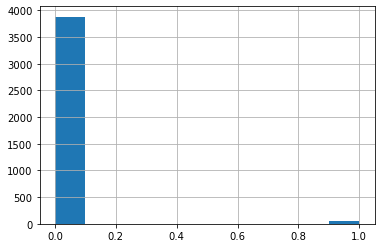

Mean:  0.015474378488077117
[6, 49, 6] [3, 54, 4]
POST-OP-OTHER-CARD ARREST_MODIFIED_MODIFIED


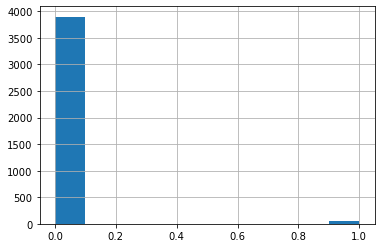

Mean:  0.011161846778285134
[4, 35, 4] [4, 31, 9]
POST-OP-OTHER-ANTICOAG EVENT_MODIFIED_MODIFIED


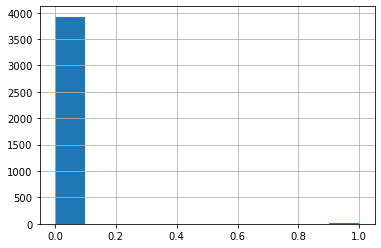

Mean:  0.0045662100456621
[2, 14, 2] [3, 13, 2]
POST-OP-OTHER-GI EVENT_MODIFIED_MODIFIED


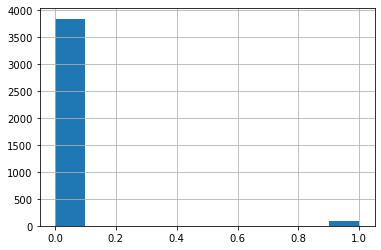

Mean:  0.024606798579401318
[10, 78, 10] [12, 77, 8]
POST-OP-OTHER-MULTI SYS FAIL_MODIFIED_MODIFIED


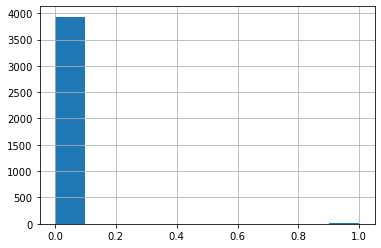

Mean:  0.00228310502283105
[1, 7, 1] [2, 6, 1]
POST-OP-OTHER-A FIB_MODIFIED_MODIFIED


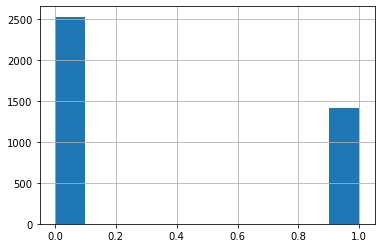

Mean:  0.35946220192795536
[142, 1133, 142] [145, 1120, 152]
POST-OP-RENAL-RENAL FAILURE_MODIFIED_MODIFIED


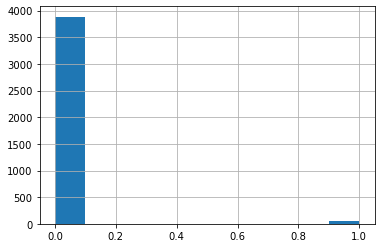

Mean:  0.014205986808726534
[6, 45, 6] [9, 40, 7]
POST-OP-RENAL-DIALYSIS REQ_MODIFIED_MODIFIED


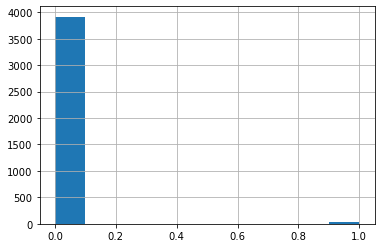

Mean:  0.006595636732623034
[3, 21, 3] [4, 19, 3]
POST-OP-SEPSIS_MODIFIED_MODIFIED


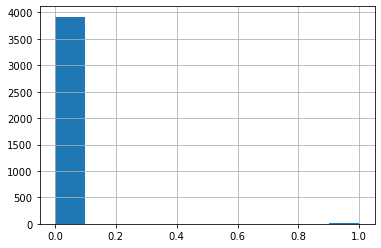

Mean:  0.0060882800608828
[2, 19, 2] [2, 19, 3]
POST-OP-SURGICAL SITE INFECTION


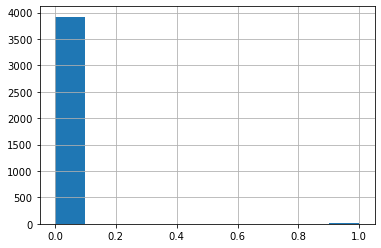

Mean:  0.0050735667174023336
[2, 16, 2] [3, 15, 2]
POST-OP-DEEP STERNAL INFECTION / MEDIASTINITIS


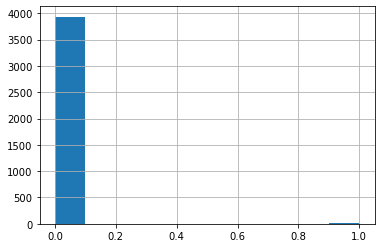

Mean:  0.0020294266869609334
[1, 6, 1] [2, 6, 0]
DISCHARGE_HOME


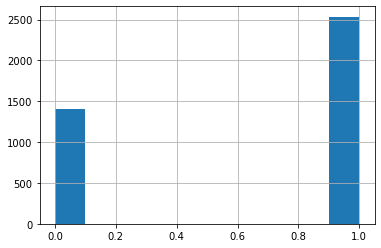

Mean:  0.6430745814307458
[254, 2027, 254] [248, 2044, 243]
COMPOSITE_READMIT_MORT


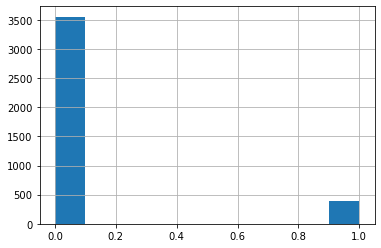

Mean:  0.09868087265347539
[39, 311, 39] [40, 301, 48]


In [46]:
#CONTINUOUS VARS

table_out = {}

for var in ['Patient Age', 'BMI', 'LOS', 'Time_to_Surgery', 'Time_from_Surgery_to_Discharge',
           'RF-Last A1c Level', 'RF-Last Hematocrit', 'RF-Last Creat Level',
                'RF-Last WBC Count', 'RF-Platelets', 'RF-INR', 'RF-Total Bilirubin',
                'RF-Total Albumin', 'Hemo Data-EF',
            'OR_Time', 'Cardiopulmonary Bypass Time', #'Circulatory Arrest Time Without Cerebral Perfusion',
           'Initial ICU Hours','mean_post_disch_mean_temp_C',
       'mean_post_disch_PM10', 'mean_post_disch_PM25', 'mean_post_disch_O3',
       'mean_post_disch_CO', 'mean_post_disch_NO2', 'mean_post_disch_SO2' ]:
    print(var.upper()) 
    plt.figure()
    post_df[var].hist()
    plt.show()
    
    out_temp = []
    out_temp.append(str(post_df[var].mean().round(2)) + '\n(' + str(round(post_df[var].std(),2)) + ')')
    out_temp.append(str(post_10_df[var].mean().round(2)) + '\n(' + str(round(post_10_df[var].std(),2)) + ')')
    out_temp.append(str(post_mid_df[var].mean().round(2)) + '\n(' + str(round(post_mid_df[var].std(),2)) + ')')
    out_temp.append(str(post_90_df[var].mean().round(2)) + '\n(' + str(round(post_90_df[var].std(),2)) + ')')
    
    #ANOVA assumptions: independence, normality, homoscedasticity
    if normaltest(post_10_df[var], nan_policy = 'omit')[1] > 0.05 and normaltest(post_mid_df[var], nan_policy = 'omit')[1] > 0.05 and normaltest(post_90_df[var], nan_policy = 'omit')[1] > 0.05:
        
        
        #test homoscedasticity
        # Bartlett Test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett
        if normaltest(post_10_df[var], nan_policy = 'omit')[1] > 0.05 and bartlett(post_mid_df[var], nan_policy = 'omit')[1] > 0.05 and bartlett(post_90_df[var], nan_policy = 'omit')[1] > 0.05:
            test = 'ANOVA'
            pval = f_oneway(post_10_df[var], post_mid_df[var], post_90_df[var],
                           nan_policy = 'omit')[1]
        
        else:
            #Alexander Govern test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alexandergovern.html#scipy.stats.alexandergovern
    
            test = 'Alexander Govern'
            pval = alexandergovern(post_10_df[var], post_mid_df[var], post_90_df[var],
                                  nan_policy = 'omit')[1]
    #if non-normal, use Kruskal-Wallis 
    else:
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal
        pval = kruskal(post_10_df[var], post_mid_df[var], post_90_df[var], nan_policy = 'omit')[1]
        test = 'Kruskal-Wallis'
    
    out_temp.append(round(pval,10))
    out_temp.append(test)
    
    table_out[var] = out_temp
    

# BINARY VARS

for var in ['Sex_Mod', 'Medicaid', 'Status_Mod', 'Hispanic or Latino or Spanish Ethnicity_Mod',
            'RF-Diabetes_Modified', 'RF-Renal Fail-Dialysis_Modified',
                 'RF-Peripheral Arterial Disease_Modified',
                 'RF-Cerebrovascular Dis_Modified',
                 'RF-Immunocompromise_Modified','RF-Chronic Lung Disease_Mod',
                'RF-High Alcohol Use_Mod', 'RF-Illicit Drug Use_Mod', 'Prior MI_Modified', 'Prev Cardiac Intervent_Modified',
                 'IABP_Modified', 'Cardiogenic Shock_Mod','Cardiac Arrhythmia_Mod', 
            'MV_Repair', 'MV_Replacement', 'CAB_Mod_Modified', 'VS-Aortic_Modified',
            'Readmission to ICU_Modified',
             'In Hospital Post-Op Events_Modified',
            'Post-Op-ReOp',

             'Post-Op-Pulm-Pneumonia_Modified_Modified',
             'Post-Op-Pulm-Vent Prolonged_Modified_Modified',
             'Post-Op-Pulmonary Thromboembolism_Modified_Modified',
             'Postop Intubation/Reintubation During Hospital Stay_Modified',

            'Post-Op-Neuro_StrokeTIAparal', 
             'Post-Op-Other-Card Arrest_Modified_Modified',
             'Post-Op-Other-Anticoag Event_Modified_Modified',
             'Post-Op-Other-GI Event_Modified_Modified',
             'Post-Op-Other-Multi Sys Fail_Modified_Modified',
             'Post-Op-Other-A Fib_Modified_Modified',
            'Post-Op-Renal-Renal Failure_Modified_Modified',
             'Post-Op-Renal-Dialysis Req_Modified_Modified',
            'Post-Op-Sepsis_Modified_Modified',
            'Post-Op-Surgical Site Infection',
            'Post-Op-Deep Sternal Infection / Mediastinitis', 
            'Discharge_Home',
             'Composite_Readmit_Mort'
           ]:
    print(var.upper())
    plt.figure()
    post_df[var].hist()
    plt.show()
    out_temp = []
    
    
    print("Mean: ", post_df[var].mean())
    out_temp.append(str(post_df[var].mean().round(2)))
    out_temp.append(str(post_10_df[var].mean().round(2)))
    out_temp.append(str(post_mid_df[var].mean().round(2)))
    out_temp.append(str(post_90_df[var].mean().round(2)))
    
    
    overall_mean = post_df[var].mean()
    n_10, n_mid, n_90 = post_10_df.shape[0], post_mid_df.shape[0], post_90_df.shape[0]
    f_exp = [round(overall_mean*n_10), round(overall_mean*n_mid), round(overall_mean*n_90)]
    f_obs = [post_10_df[var].sum(), post_mid_df[var].sum(), post_90_df[var].sum()]
    print(f_exp, f_obs)
    if np.sum(f_exp) - np.sum(f_obs) == 1:
        f_exp = [f_exp[0], f_exp[1]-1, f_exp[2]]
    elif np.sum(f_exp) - np.sum(f_obs) == -1:
        f_exp = [f_exp[0], f_exp[1]+1, f_exp[2]]
    
    if np.sum(f_exp) != np.sum(f_obs):
        pval = np.nan
    else:
        pval = round(chisquare(f_obs = f_obs, f_exp = f_exp)[1],4)
    
    out_temp.append(pval)
    out_temp.append('Chi-Square')
    
    table_out[var] = out_temp
    
    

CLASSIFICATION-NYHA_MOD


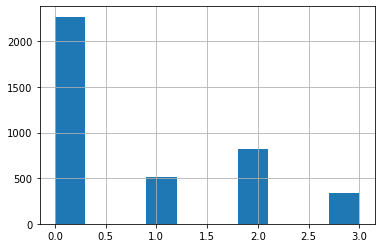

Full DF: 
 0    0.575596
2    0.208524
1    0.130644
3    0.085236
Name: Classification-NYHA_Mod, dtype: float64

10th Percentile
Mean:  0    0.551899
2    0.243038
3    0.108861
1    0.096203
Name: Classification-NYHA_Mod, dtype: float64

11-89th Percentile
Mean:  0    0.575508
2    0.204632
1    0.133883
3    0.085977
Name: Classification-NYHA_Mod, dtype: float64

90th Percentile
Mean:  0    0.600000
2    0.205063
1    0.139241
3    0.055696
Name: Classification-NYHA_Mod, dtype: float64
0    0.575596
1    0.130644
2    0.208524
3    0.085236
Name: Classification-NYHA_Mod, dtype: float64
[[227, 52, 82, 34], [1814, 412, 657, 269], [227, 52, 82, 34]]
[[218, 38, 96, 43], [1814, 422, 645, 271], [237, 55, 81, 22]]
Power_divergenceResult(statistic=array([8.89865581, 0.47676642, 4.8610948 ]), pvalue=array([0.0306691 , 0.92396526, 0.18225565]))
RACE_MOD


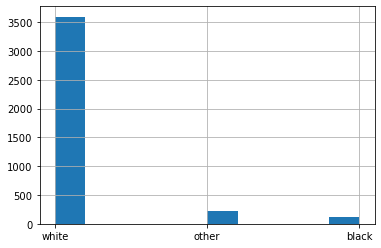

Full DF: 
 white    0.912227
other    0.057078
black    0.030695
Name: Race_Mod, dtype: float64

10th Percentile
Mean:  white    0.921519
other    0.050633
black    0.027848
Name: Race_Mod, dtype: float64

11-89th Percentile
Mean:  white    0.912437
other    0.055838
black    0.031726
Name: Race_Mod, dtype: float64

90th Percentile
Mean:  white    0.901266
other    0.073418
black    0.025316
Name: Race_Mod, dtype: float64
black    0.030695
other    0.057078
white    0.912227
Name: Race_Mod, dtype: float64
[[12, 23, 360], [97, 180, 2875], [12, 23, 360]]
[[11, 20, 364], [100, 176, 2876], [10, 29, 356]]
Power_divergenceResult(statistic=array([0.51908213, 0.18202022, 1.94299517]), pvalue=array([0.77140553, 0.91300848, 0.37851575]))
HF_MOD_MOD


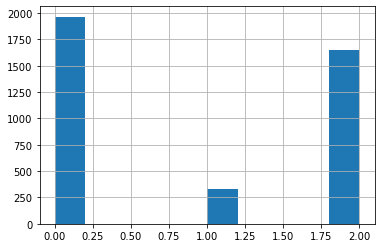

Full DF: 
 0    0.498478
2    0.418569
1    0.082953
Name: HF_Mod_Mod, dtype: float64

10th Percentile
Mean:  0    0.478481
2    0.430380
1    0.091139
Name: HF_Mod_Mod, dtype: float64

11-89th Percentile
Mean:  0    0.499365
2    0.420051
1    0.080584
Name: HF_Mod_Mod, dtype: float64

90th Percentile
Mean:  0    0.511392
2    0.394937
1    0.093671
Name: HF_Mod_Mod, dtype: float64
0    0.498478
1    0.082953
2    0.418569
Name: HF_Mod_Mod, dtype: float64
[[197, 33, 165], [1571, 261, 1319], [197, 33, 165]]
[[189, 36, 170], [1574, 254, 1324], [202, 37, 156]]
1


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
[0.         0.00031736 0.        ]

In [55]:
#HF_Mod_Mod: 1 = chronic no acute, 2 = acute exacerb, 0 = none

    
#MULTI_CATEGORY VARS

for var in ['Classification-NYHA_Mod','Race_Mod', 'HF_Mod_Mod']:
    print(var.upper())
    plt.figure()
    post_df[var].hist()
    plt.show()
    print("Full DF: \n", post_df[var].value_counts()/post_df.shape[0])
    #print("Std: ", post_df[var].std())
    print()
    print("10th Percentile")
    print("Mean: ", post_10_df[var].value_counts()/post_10_df.shape[0])
    #print("Std: ", post_10_df[var].std())
    print()
    print("11-89th Percentile")
    print("Mean: ", post_mid_df[var].value_counts()/post_mid_df.shape[0])
    #print("Std: ", post_mid_df[var].std())
    print("\n90th Percentile")
    print("Mean: ", post_90_df[var].value_counts()/post_90_df.shape[0])
    
    f_exp_percs = post_df[var].value_counts().sort_index()/post_df.shape[0]
    print(f_exp_percs)
    n_10, n_mid, n_90 = post_10_df.shape[0], post_mid_df.shape[0], post_90_df.shape[0]
    f_exp = [[round(n_10*f) for f in f_exp_percs],
              [round(n_mid*f) for f in f_exp_percs],
              [round(n_90*f) for f in f_exp_percs]]
    f_obs = [post_10_df[var].value_counts().sort_index().tolist(), 
             post_mid_df[var].value_counts().sort_index().tolist(), 
             post_90_df[var].value_counts().sort_index().tolist()]
    
    print(f_exp)
    print(f_obs)
    
    for idx, val in enumerate(f_exp):
        if np.sum(val) != np.sum(f_obs[idx]):
            print(idx)
    
    
    pval = chisquare(f_obs = f_obs, f_exp = f_exp, axis = 1)
    print(pval)
    

In [73]:
table_out['mean_post_disch_CO']

['0.59\n(0.27)',
 '0.65\n(0.26)',
 '0.59\n(0.28)',
 '0.5\n(0.26)',
 0.0,
 'Kruskal-Wallis']

In [36]:
f_obs

[[218, 38, 96, 43], [1814, 422, 645, 271], [237, 55, 81, 22]]

In [34]:
post_df['Classification-NYHA_Mod'].value_counts()

0    2269
2     822
1     515
3     336
Name: Classification-NYHA_Mod, dtype: int64

In [256]:
np.sum([1571, 261, 1319])

3151

In [260]:
#manual fiddling to fix rounding error for HF_Mod_Mod
chisquare(f_obs = [[189, 36, 170], [1574, 254, 1323], [202, 37, 156]],
          f_exp = [[197, 33, 165], [1571, 261, 1319], [197, 33, 165]])

Power_divergenceResult(statistic=array([0.45750548, 0.94531522, 0.65455464]), pvalue=array([0.79552521, 0.62334346, 0.7208838 ]))

In [242]:
1574+254+1324

3152

In [70]:
tab1_df = pd.DataFrame(table_out).T
tab1_df.columns = ['Overall', '10th Temp', '10th-90th Temp', '90th Temp', 'p-val', 'test']
tab1_df.to_excel('Jan24_Paper/Table1_Jan2024_PostTEMPS.xlsx')

In [266]:
tab1_df

,Overall,10th Temp,10th-90th Temp,90th Temp,p-val,test
Patient Age,68.05\n(11.16),68.24\n(10.83),68.07\n(11.07),67.7\n(12.17),0.9276,Kruskal-Wallis
BMI,29.62\n(5.86),29.82\n(6.06),29.61\n(5.82),29.52\n(6.02),0.7295,Kruskal-Wallis
LOS,10.82\n(7.78),12.53\n(10.72),10.6\n(7.23),10.82\n(8.26),0.0018,Kruskal-Wallis
Time_to_Surgery,2.13\n(3.7),2.54\n(4.23),2.07\n(3.6),2.12\n(3.93),0.0283,Kruskal-Wallis
Time_from_Surgery_to_Discharge,8.69\n(6.24),9.99\n(8.99),8.53\n(5.72),8.7\n(6.74),0.0133,Kruskal-Wallis
RF-Last A1c Level,6.43\n(1.42),6.56\n(1.47),6.43\n(1.43),6.33\n(1.25),0.0701,Kruskal-Wallis
RF-Last Hematocrit,38.51\n(5.71),38.25\n(6.06),38.51\n(5.66),38.77\n(5.76),0.6369,Kruskal-Wallis
RF-Last Creat Level,1.15\n(1.0),1.13\n(0.87),1.14\n(0.98),1.24\n(1.28),0.0571,Kruskal-Wallis
RF-Last WBC Count,7.87\n(3.15),7.88\n(2.55),7.87\n(2.86),7.84\n(5.22),0.2033,Kruskal-Wallis
RF-Platelets,209374.28\n(67863.35),213070.89\n(70081.42),209268.4\n(68097.67),206512.69\n(63603.98),0.5507,Kruskal-Wallis


In [238]:
post_df['HF_Mod_Mod']

0       0
1       0
2       2
3       0
4       2
       ..
3937    0
3938    0
3939    0
3940    0
3941    2
Name: HF_Mod_Mod, Length: 3942, dtype: int64

<Axes: >

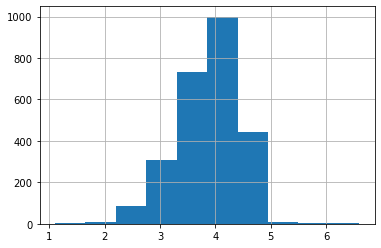

In [269]:
post_df['RF-Total Albumin'].hist()

In [270]:
var = 'RF-Total Albumin'
kruskal(post_10_df[var], post_mid_df[var], post_90_df[var], nan_policy = 'omit')[1]

1.4694955990848889e-05

# Table 2- Readmitted Patient Characteristics

In [58]:
readmit_df = post_df2[post_df2['Readmission'] == '1']
readmit_df.shape

(389, 495)

In [64]:
readmit_df['Readmit Reason'].value_counts()

Other - Related Readmission                       101
Congestive Heart Failure                           72
Arrhythmia/Heart Block                             55
Pneumonia or other Respiratory Complication        34
Pleural effusion requiring intervention            13
Respiratory complications; other                   12
PE                                                 11
Infection - Conduit Harvest Site                    9
Myocardial Infarction and/or Recurrent Angina       9
Pneumonia                                           9
Permanent CVA                                       8
GI issue                                            7
DVT                                                 7
Infection - Deep Sternum / Mediastinitis            6
Pericardial Effusion and/or Tamponade               6
Stroke                                              5
Anticoagulation Complication - Pharmacological      5
Wound; other (drainage; cellulitis)                 4
Mental status changes       

# Table 3- Temp/Pollution Characteristics

In [14]:
for col in ['mean_post_disch_mean_temp_C',
       'mean_post_disch_PM10', 'mean_post_disch_PM25', 'mean_post_disch_O3',
       'mean_post_disch_CO', 'mean_post_disch_NO2', 'mean_post_disch_SO2',]:
    print(col)
    print(post_df[col].mean())
    print(post_df[col].std())
    print()

mean_post_disch_mean_temp_C
11.290674337061008
8.489370855924278

mean_post_disch_PM10
13.308920805616252
3.2978485502848214

mean_post_disch_PM25
6.826275637697891
1.9546381692221222

mean_post_disch_O3
0.03880777961167556
0.007144782278529998

mean_post_disch_CO
0.5879560419018047
0.2744658167671699

mean_post_disch_NO2
23.147866387719557
9.570167841225853

mean_post_disch_SO2
1.6686929707507485
2.0376616362296702



In [20]:
post_df['disch__spring'].sum()/post_df.shape[0]

0.2280568239472349

In [21]:
post_df['disch__summer'].sum()/post_df.shape[0]

0.24708269913749364

In [22]:
post_df['disch__winter'].sum()/post_df.shape[0]

0.25012683916793504

<Axes: >

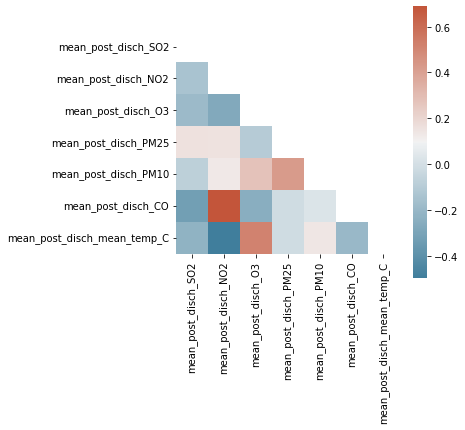

In [9]:
var = ['mean_post_disch_SO2', 'mean_post_disch_NO2', 'mean_post_disch_O3',
'mean_post_disch_PM25', 'mean_post_disch_PM10', 'mean_post_disch_CO',
'mean_post_disch_mean_temp_C']

corr = post_df[var].corr(method = 'pearson')
mask = np.triu(np.ones_like(corr,dtype = bool))
f, ax = plt.subplots(figsize = (5,5))
cmap = sns.diverging_palette(230,20,as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, square = True)

In [ ]:
var = 'mean_post_disch_SO2'
print(post_10_df[var].mean(), post_mid_df[var].mean(), post_90_df[var].mean())
print(kruskal(post_10_df[var], post_mid_df[var], post_90_df[var], 
        nan_policy = 'omit'))

post_10_df[var].hist()
#post_mid_df[var].hist()
post_90_df[var].hist()